# 1. Datenimport und -bereinigung
---
## 1.1 Datenimport
---

Hier werden aus einem csv file Pflanzendaten (Insektenfreundliche, Standortansprüche, Blütemonate etc.) zur Berechnung des Bienen- und des Blühzeitscores in ein pandas Dataframe gelesen.

### 1.1.1 Importieren der benötigten Libraries:
- _pandas_
- _Pandas_profiling_

In [4]:
import pandas as pd
import pandas_profiling as pp

### 1.1.2 Einlesen der csv-Datei "DatenBalkonien" aus dem Importordner

In [5]:
#Import der Daten als Dataframe
plantfacts_df = pd.read_csv('./Import/DatenBalkonien.csv',sep=",")

In [6]:
#Anzeigen Typ und Prüfung, ob Pandas Dataframe erstellt wurde.
print(type(plantfacts_df))

<class 'pandas.core.frame.DataFrame'>


In [7]:
#Anzeigen Attribute
plantfacts_df.head()

,Name,botanischer Name,Pflanzenart,Biene,Schmetterling,Vogel,Hummel,(Schweb-)fliege,Winterhart,Sonne,...,Apr,Mai,Jun,Jul,Aug,Sep,Okt,Nov,Dez,Quelle
0,Zitronenmelisse,unkown,Kräuter,1,1,0,0,0,1,1,...,0,0,1,1,1,0,0,0,0,Biogarten
1,Zierapfel,unkown,Rosengewächs,1,0,1,0,0,1,1,...,1,1,0,0,0,0,0,0,0,Biogarten
2,Winterheckenzwiebel,unkown,Gemüse,1,1,0,0,0,1,1,...,0,0,1,1,1,0,0,0,0,Biogarten
3,Winter-Bohnenkraut,unkown,Gemüse,1,1,0,0,0,1,1,...,0,0,1,1,1,1,0,0,0,Biogarten
4,Schwarzer Holunder,unkown,Staude,1,1,1,0,0,1,1,...,0,1,1,0,0,0,0,0,0,Biogarten


In [8]:
#Anzeigen Dataframe und Durchsicht auf Null-Werte / Richtigkeit Datentypen.
plantfacts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              117 non-null    object
 1   botanischer Name  117 non-null    object
 2   Pflanzenart       117 non-null    object
 3   Biene             117 non-null    int64 
 4   Schmetterling     117 non-null    int64 
 5   Vogel             117 non-null    int64 
 6   Hummel            117 non-null    int64 
 7   (Schweb-)fliege   117 non-null    int64 
 8   Winterhart        117 non-null    int64 
 9   Sonne             117 non-null    int64 
 10  Halbschatten      117 non-null    int64 
 11  Schatten          117 non-null    int64 
 12  Wasserbedarf      117 non-null    int64 
 13  Wuchshöhe         117 non-null    object
 14  Jan               117 non-null    int64 
 15  Feb               117 non-null    int64 
 16  Mrz               117 non-null    int64 
 17  Apr             

## 1.2 Datenbereinigung 
---

Hier wird eine Kopie des Dataframes erstellt, das um nicht genutzte Attribute sowie Duplikate und fehlerhafte Werte (nicht vorhanden) bereinigt wird. Spaltenbezeichnungen und Pflanzennamen werden vereinheitlicht (lowercase, Spaltenbezeichnungen: keine Leerzeichen).

In [9]:
#Kopie des Dataframes und Aussortieren der Attribute (Spalten), die nicht weiter verwendet werden.
plants_df = plantfacts_df.copy()
plants_df. drop(plants_df.columns[[4,5,6,7,8,9,10,11,12,13,26]],
                    axis = 1,
                    inplace = True)

In [10]:
#Ausgabe des neuen Dataframes.
plants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              117 non-null    object
 1   botanischer Name  117 non-null    object
 2   Pflanzenart       117 non-null    object
 3   Biene             117 non-null    int64 
 4   Jan               117 non-null    int64 
 5   Feb               117 non-null    int64 
 6   Mrz               117 non-null    int64 
 7   Apr               117 non-null    int64 
 8   Mai               117 non-null    int64 
 9   Jun               117 non-null    int64 
 10  Jul               117 non-null    int64 
 11  Aug               117 non-null    int64 
 12  Sep               117 non-null    int64 
 13  Okt               117 non-null    int64 
 14  Nov               117 non-null    int64 
 15  Dez               117 non-null    int64 
dtypes: int64(13), object(3)
memory usage: 14.8+ KB


In [11]:
#Duplikate finden und beheben. 
pp.ProfileReport(plants_df, minimal=True)

NameError: name 'pp' is not defined

In [12]:
#Es gibt einige Duplikate, z.B. Oregano:
print(plants_df.loc[plants_df['botanischer Name'] == 'Origanum vulgare'])

        Name  botanischer Name Pflanzenart  Biene  Jan  Feb  Mrz  Apr  Mai  \
19   Oregano  Origanum vulgare     Kräuter      1    0    0    0    0    0   
107  Oregano  Origanum vulgare     Kräuter      1    0    0    0    0    0   

     Jun  Jul  Aug  Sep  Okt  Nov  Dez  
19     0    1    1    1    0    0    0  
107    0    1    1    1    0    0    0  


In [13]:
#Löschen von Duplikaten in der Spalte 'Namen' aus dem Dataframe, da dieser für den Abgleich mit der Usereingabe benötigt wird:
plants_df.drop_duplicates(subset=['Name'], keep='first', inplace=True, ignore_index=True)
print(plants_df.loc[plants_df['botanischer Name'] == 'Origanum vulgare'])

       Name  botanischer Name Pflanzenart  Biene  Jan  Feb  Mrz  Apr  Mai  \
19  Oregano  Origanum vulgare     Kräuter      1    0    0    0    0    0   

    Jun  Jul  Aug  Sep  Okt  Nov  Dez  
19    0    1    1    1    0    0    0  


In [14]:
#Spaltenbezeichnungen: Lowercase und _ statt Leerzeichen.
plants_df = plants_df.rename(columns={'botanischer Name': 'botanischer_Name'})
plants_df = plants_df.rename(str.lower, axis='columns')
#Pflanzennamen: Lowercase.
plants_df['name'] = plants_df['name'].str.lower()
plants_df.head()

,name,botanischer_name,pflanzenart,biene,jan,feb,mrz,apr,mai,jun,jul,aug,sep,okt,nov,dez
0,zitronenmelisse,unkown,Kräuter,1,0,0,0,0,0,1,1,1,0,0,0,0
1,zierapfel,unkown,Rosengewächs,1,0,0,0,1,1,0,0,0,0,0,0,0
2,winterheckenzwiebel,unkown,Gemüse,1,0,0,0,0,0,1,1,1,0,0,0,0
3,winter-bohnenkraut,unkown,Gemüse,1,0,0,0,0,0,1,1,1,1,0,0,0
4,schwarzer holunder,unkown,Staude,1,0,0,0,0,1,1,0,0,0,0,0,0


In [15]:
#Ausgeben des Dataframes.
plants_df.info()
#Ausgeben als csv file.
plants_df.to_csv('./Import/plants_df.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              110 non-null    object
 1   botanischer_name  110 non-null    object
 2   pflanzenart       110 non-null    object
 3   biene             110 non-null    int64 
 4   jan               110 non-null    int64 
 5   feb               110 non-null    int64 
 6   mrz               110 non-null    int64 
 7   apr               110 non-null    int64 
 8   mai               110 non-null    int64 
 9   jun               110 non-null    int64 
 10  jul               110 non-null    int64 
 11  aug               110 non-null    int64 
 12  sep               110 non-null    int64 
 13  okt               110 non-null    int64 
 14  nov               110 non-null    int64 
 15  dez               110 non-null    int64 
dtypes: int64(13), object(3)
memory usage: 13.9+ KB


**Frage Anna: Können wir die Ausgabe als csv entfernen, oder greifst du irgendwo darauf zu, Reto?**

# 2 Programm
---

Es werden aufgrund einer Usereingabe (2.1) der auf Balkon / im Garten befindlichen Pflanzen der Biodiversitätsindex (2.2) sowie ein Bienenscore berechnet und eine Empfehlung zur Verbesserung des Bienenscores (2.3) gegeben. Es wird ebenfalls angezeigt, in welchen Monaten keine Pflanze blüht und somit keine Nahrung für Bienen geboten wird (2.4). 

## 2.1 Usereingabe Pflanzen
---

Mit hilfe einer Funktion für die Usereingabe wird abgefragt, wie viele unterschiedliche Pflanzenarten auf dem Balkon/im Garten des Users wachsen, welche das sind und wie viele Pflanzen jeweils.
Die Eingaben werden in ein Dataframe user_input() geschrieben.

*Beispiele für mögliche Usereingabe*

*positives Beispiel (7): Kornelkirsche, Oregano, Rose ungefüllt, gewöhnliche Waldrebe, Safran, Tulpe, Kornblume (jeweils 1)*

*negatives Beispiel (3): Bauernhortensie (50), Berg-Waldrebe (1), Wald-Erdbeere(1)*

In [43]:
def input_plant_name(pflanze):
    ad = input("Name der Pflanzenart: ")
    
    # check 1: in Liste?
    if ad.lower() not in plants_df["name"].tolist():
        print("Pflanzenart ist nicht bekannt. Bitte erneut eingeben.")
        ad = input_plant_name(pflanze)
        
    # check 2: Eingabe bereits erfolgt
    if ad.lower() in pflanze:
        print("Du hast diese Pflanzenart bereits eingegeben. Bitte eine andere Art eingeben.")
        ad = input_plant_name(pflanze)

    return ad


def check_plant_number(input):
    try:
        # Convert it into integer
        val = int(input)
        return val
    except ValueError:
        print("Anzahl ist keine Zahl. Bitte erneut eingeben.")
        return input_plant_number()
    return val


def input_plant_number():
    return check_plant_number(input("Anzahl: ")) 
    

def user_input():
    n = int(input("Wie viele Pflanzenarten haben Sie insgesamt?: "))
    pflanze = []
    pflanze_anzahl = []
    for i in range(n):
        ad = input_plant_name(pflanze)
        nm = input_plant_number()
        ad_l = ad.lower()
        pflanze.append(ad_l)
        pflanze_anzahl.append(nm)
    list_user = {"name": pflanze, "anzahl": pflanze_anzahl}
    user_df = pd.DataFrame(list_user)
    return user_df


user_df = user_input() 
user_df

Wie viele Pflanzenarten haben Sie insgesamt?: 2
Name der Pflanzenart: Tulpe
Anzahl: 3
Name der Pflanzenart: Tulpe
Du hast diese Pflanzenart bereits eingegeben. Bitte eine andere Art eingeben.
Name der Pflanzenart: Bauernhortensie
Anzahl: 3


,name,anzahl
0,tulpe,3
1,bauernhortensie,3


## 2.2 Diversitätsberechnung
---

Hier wird die Biodiversität anhand des XYZ Index berechnet... Der Index eignet sich für .. Ein Index < ... ist gut, ein Index > zu gering...

In [45]:
#ANPASSEN: Berechnung der Alpha Diversität (in einem abgrenzbaren Lebensraum) mit Shannon-Index (H):

from math import log as ln

def shannon_index(user_input):
    def p(n, N):
         return (float(n) / N) * ln(float(n) / N)
    N = user_input.anzahl.sum()

    sdi = -sum(p(n, N) for n in user_input.anzahl if n != 0)
    #evern = sdi / ln(user_input.name.count())
    evern = sdi / ln(10)
    
    print("Dein Shannon-Index (H) ist:", evern)
    
    if evern > 0.5:
        print("Dein Balkon hat eine guten BioDiv")
    else:
        print("Dein Balkon hat einen niedrigen BioDiv")
        
shannon_index(user_df)

Dein Shannon-Index (H) ist: 0.30102999566398114
Dein Balkon hat einen niedrigen BioDiv


**Anmerkung Anna:**

**Ich bekomme auch einen guten BioDiv, wenn ich nur 2 verschiede Pflanzenarten mit je 2 Pflanzen eingebe. 
Ab wann kann man das Ergebnis als gut bezeichnen? 
Nach diesem Video (https://www.youtube.com/watch?v=-FsRYC5QwkA ca. min 3:05) ist 
    < 1 eine sehr niedriger Alpha Diversität, 
    bis 1,5 vergleichsweise niedrige Diversität
    ab > 2 hohe Diversität.**

## 2.3 Bienenscore
---

Hier wird aus der Anzahl bienenfreundlicher Pflanzen (bienenfreundliche Pflanze * Anzahl) ein Bienescore (Anzahl bienenfreundliche Pflanzen / Pflanzen gesamt) berechnet. Ist dieser < 85%, wird eine Empfehlung ausgegeben, mit welchen bienenfreundlichen Pflanzen der Score verbessert werden kann.

In [46]:
#neues Dataframe mit allen Spalten aus plants_df zu Usereingabe erstellen.
user_plants_df = pd.merge(plants_df, user_df, on=['name'], how='inner')
#Spalte mit Score für für Bienen wertvolle Pflanzen.
user_plants_df = user_plants_df.assign(score_biene=user_plants_df['biene']*user_plants_df['anzahl'])
user_plants_df

,name,botanischer_name,pflanzenart,biene,jan,feb,mrz,apr,mai,jun,jul,aug,sep,okt,nov,dez,anzahl,score_biene
0,bauernhortensie,unkown,Staude,0,0,0,0,0,0,1,1,1,1,1,0,0,3,0
1,tulpe,unkown,Staude,0,0,0,0,1,1,0,0,0,0,0,0,0,3,0


In [47]:
#Zeile mit Summe je Spalte hinzufügen oder Summe score_biene berechnen.
Total = user_plants_df['score_biene'].sum()/user_df['anzahl'].sum()*100
print("Anzahl bienenfreundliche Pflanzen: ",user_plants_df['score_biene'].sum())
print("Anzahl Pflanzen gesamt: ", user_df['anzahl'].sum())
print("Dein Bienenscore ist =",Total,"%.")

Anzahl bienenfreundliche Pflanzen:  0
Anzahl Pflanzen gesamt:  6
Dein Bienenscore ist = 0.0 %.


In [48]:
#Feedback zu Bienenscore:
if Total > 85:
    print("Das ist super! Glückwunsch :-)")
else:
    print("Du solltest mehr bienenfreundliche Pflanzen pflanzen. Zum Beispiel")

Du solltest mehr bienenfreundliche Pflanzen pflanzen. Zum Beispiel: 


**Anmerkung Jana: Empfehlung in Codezeile oben mit rein**

In [49]:
#Empfehlung, falls Bienenscore <=85%:
if Total <= 85:
        subset_biene_df = plants_df.loc[plants_df['biene'] == 1]
        print(subset_biene_df.name.sample(5))

42            ballonblume
2     winterheckenzwiebel
40               rosmarin
65            topfdahlien
14        echter gamander
Name: name, dtype: object


**Hinweis Anna**

**Code subset Biene geändert. Es hat alle Bienen, nicht nur Biene = 1 angezeigt.**

## 2.4 Blühzeitscore
---

Hier wird dargestellt, in welchen Monaten die vorhandenen Pflanzen Blüte tragen und welche davon für Bienen nützlich sind. Fehlen Blüten für Bienen in Monaten außer Januar und Februar wird der User darauf hingewiesen beim nächsten Pflanzenkauf darauf zu achten, bienenfreundliche Pflanzen mit Blüte in diesen Monaten zu kaufen.

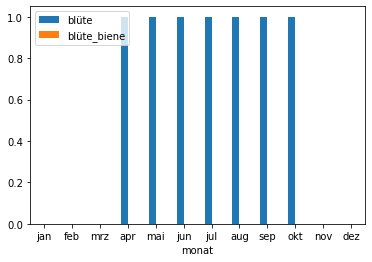

In [50]:
#Dataframe über Monat, Blüte und bienenfreundliche Blüte:
monat = ['jan', 'feb', 'mrz', 'apr', 'mai', 'jun', 'jul', 'aug', 'sep', 'okt', 'nov', 'dez'] 
blüte = list(map(lambda monat: user_plants_df[monat].sum(), monat))
subset_user_plants_df=user_plants_df.loc[user_plants_df['biene'] == 1]
blüte_biene = list(map(lambda monat: subset_user_plants_df[monat].sum(), monat))

blüte_anz_monat_df = pd.DataFrame({'monat': monat, 'blüte': blüte, 'blüte_biene': blüte_biene})

#Visualisierung der Anzahl blühender Pflanzenarten sowie bienenfreundlicher blühenden Pflanzenarten je Monat
ax_blüte = blüte_anz_monat_df.plot.bar(x='monat', rot=0)

In [51]:
#Hinweis, in welchen Monaten Blüte für Bienen fehlt. 
keine_blüte_biene = blüte_anz_monat_df.loc[blüte_anz_monat_df['blüte_biene'] == 0]

from functools import reduce
monate = reduce(lambda a, b: a + ', ' + b, keine_blüte_biene['monat'].tolist())

if monate == 'jan, dez':
    print("Super!")
else:
    print("In den folgenden Monaten blüht keine Pflanze:", monate)
    print("Du solltest beim nächsten Pflanzenkauf darauf achten Pflanzen zu wählen, die bienenfreundlich sind und in diesen Monaten blühen.")

In den folgenden Monaten blüht keine Pflanze: jan, feb, mrz, apr, mai, jun, jul, aug, sep, okt, nov, dez
Du solltest beim nächsten Pflanzenkauf darauf achten Pflanzen zu wählen, die bienenfreundlich sind und in diesen Monaten blühen.


In [ ]:
#Empfehlung, in welchen Monaten noch Blüte fehlt, ggf. welche Pflanzen das ändern könnten. 